In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc,roc_auc_score,RocCurveDisplay



In [24]:
wine_data = pd.read_csv('wine.csv')

# Create a DataFrame
df = pd.DataFrame(wine_data)

# Display the first few rows of the DataFrame
print(df.head())

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


In [25]:
#Describe basic stats about the dataset
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Text(0.5, 0.98, 'Histogram of Wine Features')

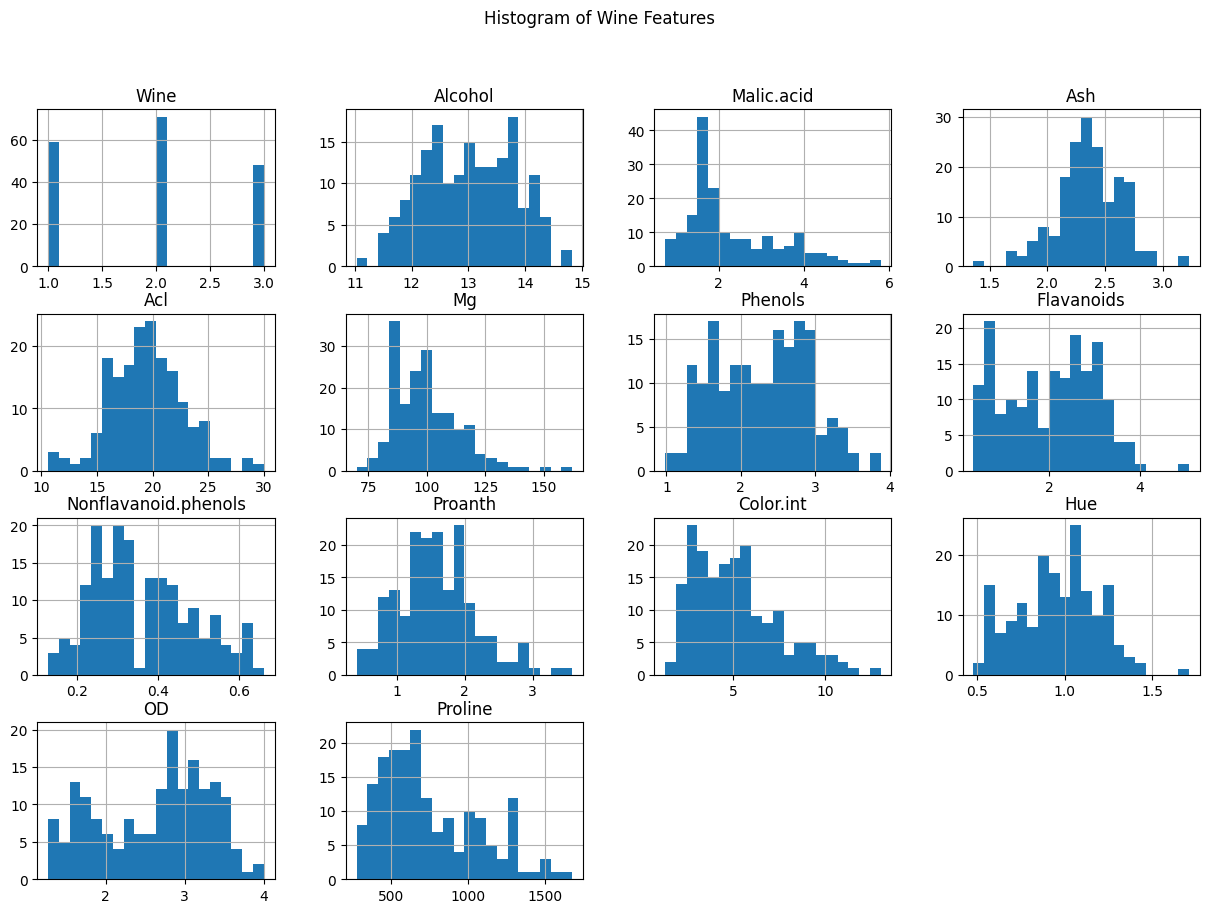

In [26]:
#Representing the data in a Histogram
df.hist(bins = 20, figsize=(15,10))
plt.suptitle('Histogram of Wine Features')


In [28]:
# Extracting all columns except the first one as features
X = df.iloc[:,1:]

# Extracting the first column as the target variable
y = df.iloc[:,0]


In [29]:
# Splitting the dataset into training and testing sets
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [30]:
# Initializing the StandardScaler to standardize features
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming it
X_train = scaler.fit_transform(X_train)

# Transforming the test data using the same scaler
x_test = scaler.transform(x_test)


In [31]:
# Calculating the number of null values in each column of the DataFrame
null_values = df.isnull().sum()


In [32]:
# Initializing the MLPClassifier with specified hyperparameters
mlp = MLPClassifier(
    hidden_layer_sizes=(5,),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=200,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    tol=1e-4,
    verbose=True
)
# Fitting the MLP model to the training data
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.30518854
Validation score: 0.200000
Iteration 2, loss = 1.29658340
Validation score: 0.200000
Iteration 3, loss = 1.28805670
Validation score: 0.200000
Iteration 4, loss = 1.27960724
Validation score: 0.200000
Iteration 5, loss = 1.27123537
Validation score: 0.200000
Iteration 6, loss = 1.26294115
Validation score: 0.266667
Iteration 7, loss = 1.25467801
Validation score: 0.266667
Iteration 8, loss = 1.24647432
Validation score: 0.266667
Iteration 9, loss = 1.23832509
Validation score: 0.266667
Iteration 10, loss = 1.23019382
Validation score: 0.266667
Iteration 11, loss = 1.22214484
Validation score: 0.266667
Iteration 12, loss = 1.21418337
Validation score: 0.266667
Iteration 13, loss = 1.20630726
Validation score: 0.266667
Iteration 14, loss = 1.19844158
Validation score: 0.266667
Iteration 15, loss = 1.19060219
Validation score: 0.266667
Iteration 16, loss = 1.18286748
Validation score: 0.266667
Iteration 17, loss = 1.17521229
Validation score: 0.266667
Valida

MLPClassifier(early_stopping=True, hidden_layer_sizes=(5,), random_state=42,
              verbose=True)

In [33]:
# Predicting labels for the test data using the trained MLP model
y_pred = mlp.predict(x_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generating the confusion matrix
conf_matrx = confusion_matrix(y_test, y_pred)

# Printing the performance metrics and confusion matrix
print(f"Accuracy of MLP Classifier: {accuracy:.2f}")
print(f"Precision of MLP Classifier: {precision:.2f}")
print(f"recall of MLP Classifier: {recall:.2f}")
print(f"f1 of MLP Classifier: {f1:.2f}")
print("")
print('Confusion Matrix:')
print(conf_matrx)


Accuracy of MLP Classifier: 0.36
Precision of MLP Classifier: 0.37
recall of MLP Classifier: 0.36
f1 of MLP Classifier: 0.28

Confusion Matrix:
[[12  1  1]
 [ 7  1  6]
 [ 8  0  0]]


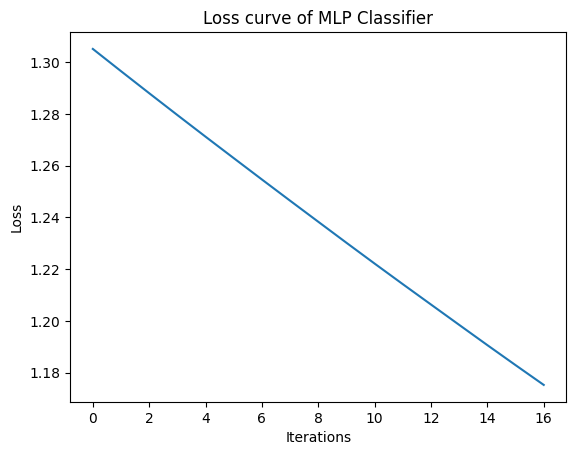

In [34]:
# Plotting the loss curve for the MLP classifier
# This shows the loss value over iterations during training
plt.plot(mlp.loss_curve_)
plt.title('Loss curve of MLP Classifier')
plt.xlabel('Iterations')
plt.ylabel('Loss')


plt.show()

In [35]:
# Initializing the RandomForestClassifier with default hyperparameters
rfc = RandomForestClassifier(
)
# Fitting the Random Forest model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Predicting labels for the test data using the trained Random Forest model
y_pred_forrest = rfc.predict(x_test)

# Calculating performance metrics for the Random Forest classifier
accuracy_tree = accuracy_score(y_test, y_pred_forrest)
precision_tree = precision_score(y_test, y_pred_forrest, average='weighted')
conf_matrix_tree = confusion_matrix(y_test, y_pred_forrest)
recall_tree = recall_score(y_test,y_pred_forrest,average='weighted')
f1_tree = f1_score(y_test,y_pred_forrest,average='weighted')

# Printing the performance metrics and confusion matrix
print(f"Accuracy of Random Forest Classifier: {accuracy_tree:.2f}")
print(f"Precision of Random Forest Classifier: {precision_tree:.2f}")
print(f"recall of Random Forest Classifier: {recall_tree:.2f}")
print(f"f1 of Random Forest Classifier: {f1_tree:.2f}")
print("")
print('Confusion Matrix:')
print(conf_matrix_tree)

Accuracy of Random Forest Classifier: 1.00
Precision of Random Forest Classifier: 1.00
recall of Random Forest Classifier: 1.00
f1 of Random Forest Classifier: 1.00

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


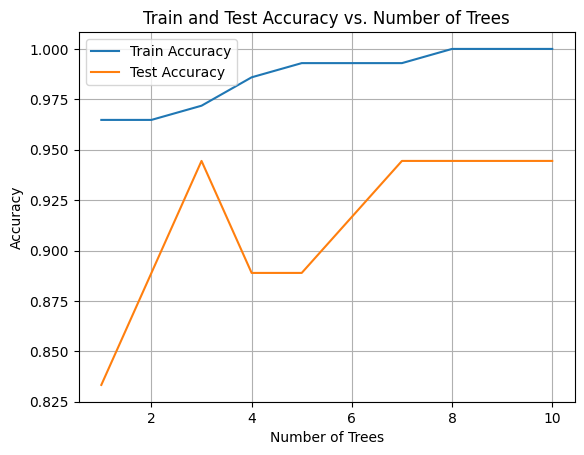

In [37]:
# Number of estimators (trees) to evaluate
n_estimators = 10
train_results = []
test_results = []

# Looping through different numbers of estimators
for n in range(1, n_estimators + 1):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

 # Predicting on both training and test data
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(x_test)

    # Calculating accuracy for both training and test data
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

 # Appending accuracy results to the respective lists
    train_results.append(train_acc)
    test_results.append(test_acc)

# Plotting the accuracy results against the number of trees
plt.plot(range(1, n_estimators + 1), train_results, label='Train Accuracy')
plt.plot(range(1, n_estimators + 1), test_results, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Train and Test Accuracy vs. Number of Trees')
plt.show()

In [38]:
# Compute the probabilities of the positive class (for multi-class, consider each class vs rest)
mlp_probs = mlp.predict_proba(x_test)
rf_probs = rf.predict_proba(x_test)

In [39]:
# Calculating the ROC curve for the MLP classifier
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_probs[:, 1], pos_label=1)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs[:, 1], pos_label=1)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
roc_auc_rf = auc(fpr_rf, tpr_rf)

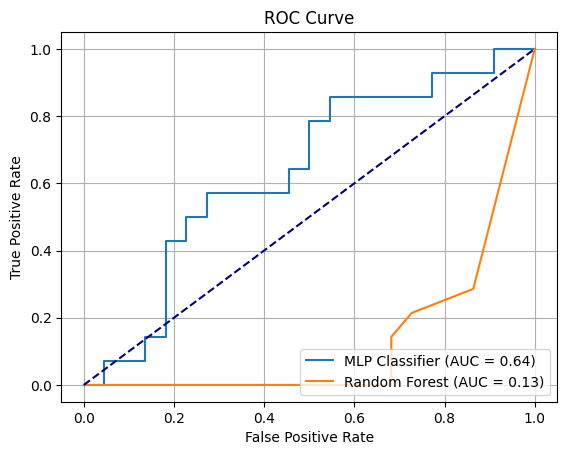

In [40]:
# Plot ROC curves
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP Classifier (AUC = {roc_auc_mlp:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [41]:
# Extracting feature importances from the Random Forest model
feature_importances = rf.feature_importances_
# Sorting the indices of features based on their importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Printing the features and their importance scores in descending order
for idx in sorted_indices:
    print(f"Feature: {X.columns[idx]}, Importance: {feature_importances[idx]:.4f}")


Feature: Flavanoids, Importance: 0.3803
Feature: Color.int, Importance: 0.1258
Feature: OD, Importance: 0.1016
Feature: Phenols, Importance: 0.0855
Feature: Proline, Importance: 0.0853
Feature: Mg, Importance: 0.0649
Feature: Alcohol, Importance: 0.0491
Feature: Nonflavanoid.phenols, Importance: 0.0319
Feature: Hue, Importance: 0.0307
Feature: Malic.acid, Importance: 0.0214
Feature: Ash, Importance: 0.0144
Feature: Acl, Importance: 0.0062
Feature: Proanth, Importance: 0.0030


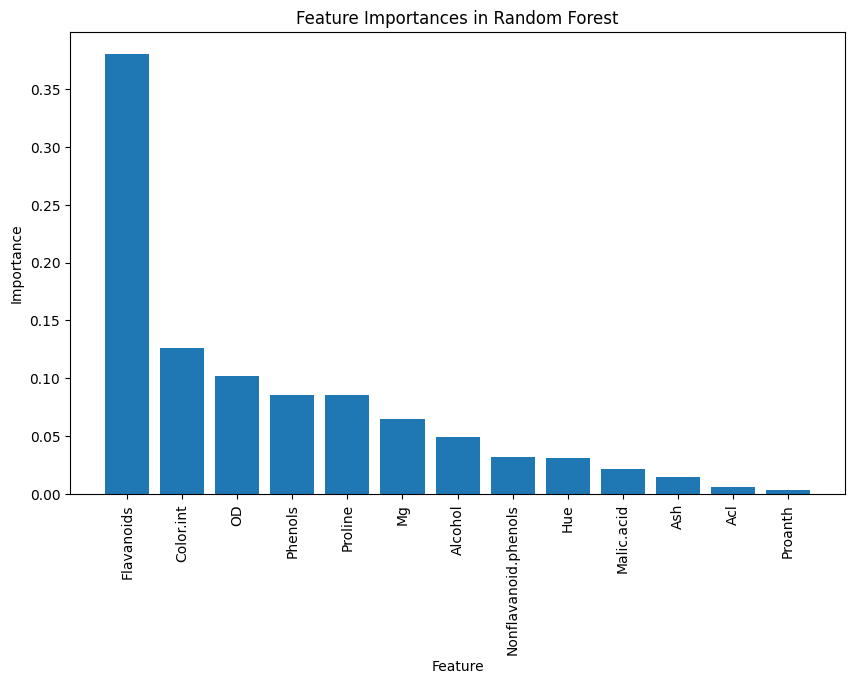

In [42]:
import matplotlib.pyplot as plt

# Creating a figure with a size of 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Plotting a bar chart for feature importances
# The bars represent the importance of each feature, sorted in descending order
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title("Feature Importances in Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
# Displaying the plot
plt.show()

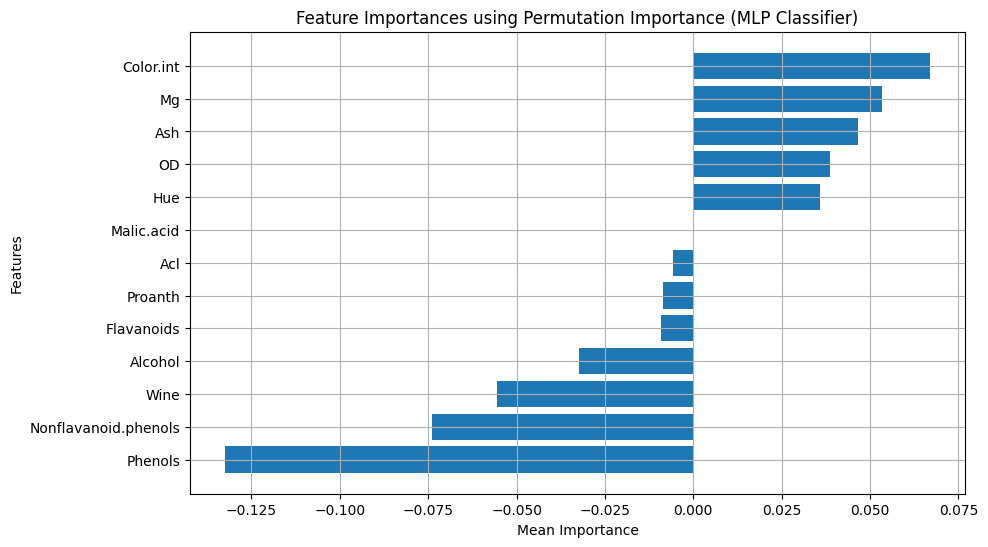

In [43]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(
    mlp, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

# Get the sorted indices of feature importances
sorted_indices = result.importances_mean.argsort()

# Assuming you have the correct feature names, otherwise, replace with appropriate names
feature_names = df.columns.tolist()  # Replace `df` with your original DataFrame if used

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indices], result.importances_mean[sorted_indices], align='center')
plt.xlabel('Mean Importance')
plt.ylabel('Features')
plt.title('Feature Importances using Permutation Importance (MLP Classifier)')
plt.grid(True)
plt.show()